In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
import random as rd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

# Data
## Loading

In [2]:
mnist_data = fetch_openml('mnist_784',version = 1)

## Exploration

In [3]:
X, y = mnist_data['data'], mnist_data['target']
print('Shape of X:', X.shape, '\nShape of y:', y.shape)

Shape of X: (70000, 784) 
Shape of y: (70000,)


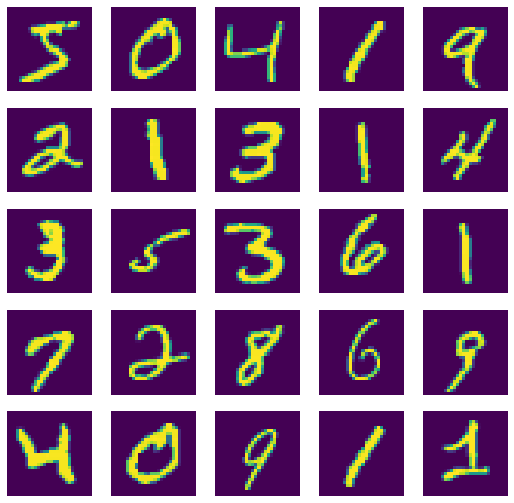

In [4]:
plt.figure(figsize=(9,9))
for i in np.arange(1,26):
    digit= X.iloc[i-1]
    digit_pixels = np.array(digit).reshape(28,28)
    plt.subplot(5,5,i)
    plt.imshow(digit_pixels)
    plt.axis('off')
plt.show()

In [5]:
y = y.astype(np.uint8)
type(y[0])

numpy.uint8

In [6]:
## Separation into training and test data

In [7]:
X_train, X_test = X[:60000],X[60000:]
Y_train, Y_test = y[:60000],y[60000:]

# Model
## K-nn preparation
There are two parameters to play on: the distance function and the number of neighbors $K$.

In [8]:
print('Shape of Training data: ', X_train.shape)
print('Shape of Testing data: ', X_test.shape)

Shape of Training data:  (60000, 784)
Shape of Testing data:  (10000, 784)


Given the numerous data, K-nn calculate the distances between all the training points and the point to be tested.\
The calculations can be time-consuming.\
We reduce their size by 100

In [10]:
a = []
b = []
for i in range(60000):
    a.append(i) 
for j in range(10000):
    b.append(j)

sample_knn_train = rd.sample(a,600)
sample_knn_test = rd.sample(b,100)

In [11]:
X_train_kNN = X_train.iloc[sample_knn_train]
Y_train_kNN = Y_train.iloc[sample_knn_train]
X_test_kNN = X_test.iloc[sample_knn_test]
Y_test_kNN = Y_test.iloc[sample_knn_test]

In [12]:
print('Shape of Training data: ', X_train_kNN.shape)
print('Shape of Testing data: ', X_test_kNN.shape)

Shape of Training data:  (600, 784)
Shape of Testing data:  (100, 784)


In [13]:
print('Shape of Training label: ', Y_train_kNN.shape)
print('Shape of Testing label: ', Y_test_kNN.shape)

Shape of Training label:  (600,)
Shape of Testing label:  (100,)


## K-nn definition

### distance function

In [36]:
def d1(x,y):
    return np.sum(np.square(x-y))
def d2(x,y):
    return np.sqrt(np.sum(np.square(x-y)))
def d(x,y):
    return np.linalg.norm(x-y)

### K-nn function

In [16]:
def kNN(x, k ,data, label):
    #list of distance between a given picture and train pictures
    distances =[d1(x,data.iloc[i]) for i in range(len(data))]
    idx = np.argpartition(distances, k)
    clas, freq = np.unique(label.iloc[idx[:k]], return_counts=True)
    return clas[np.argmax(freq)]

### Test with one picture

In [19]:
i = 5
K = 5
print('Predicted value: ', kNN(X_test_kNN.iloc[i], K, X_train_kNN, Y_train_kNN), '\nReal value: ',Y_test_kNN.iloc[i])

Predicted value:  6 
Real value:  6


### Test with all test picture and K=5

In [22]:
#accuracy list
acc_lst_kNN = []
for i in range(len(Y_test_kNN)-1):
    if kNN(X_test_kNN.iloc[i], 5, X_train_kNN, Y_train_kNN) == Y_test_kNN.iloc[i]:
        acc_lst_kNN.append(1)
    else:
        acc_lst_kNN.append(0)

In [24]:
Accuracy = sum(acc_lst_kNN)/len(acc_lst_kNN)
print("Accuracy for K=",5,": ", round(Accuracy*100,2), "%")

Accuracy for K= 5 :  92.93 %


### K optimisation

In [25]:
k_list = np.arange(1,15)

In [27]:
Accuracy_list = []
for k in k_list:
    acc_lst_kNN = []
    for i in range(len(Y_test_kNN)-1):
        if kNN(X_test_kNN.iloc[i], k, X_train_kNN, Y_train_kNN) == Y_test_kNN.iloc[i]:
            acc_lst_kNN.append(1)
        else:
            acc_lst_kNN.append(0)
    Accuracy_list.append((sum(acc_lst_kNN)/len(acc_lst_kNN))*100)

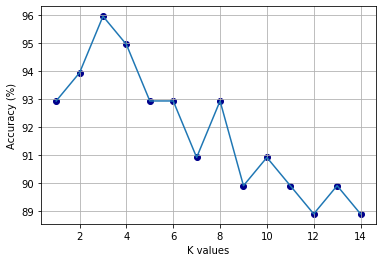

In [30]:
plt.figure()
plt.grid()
plt.plot(k_list,Accuracy_list)
plt.scatter(k_list,Accuracy_list,c="darkblue")
plt.xlabel("K values")
plt.ylabel("Accuracy (%)")
plt.show()

$K = 3$ gives us an accuracy of $96$%.\
Warnings : the model has been trained with few values, it is less robust.